# Convert Umiujac FOREST forcing files to CLASSIC
https://cccma.gitlab.io/classic/makeInputFiles.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import os

## Umiujaq FOREST, northeastern Canada

The nearby trees did not obstruct the instruments at the FOREST site, and the surface underneath them was covered with grass.

| Short name | umf |
|:-----------|:----|
| Location | 56.55308°N, 76.48234°W |
| Elevation | 82 m |
| Snow-free albedo | - |
| Simulation period | 26 Nov 2015 to 14 October 2021 |
| Temperature/humidity measurement height | 2.3 m |
| Wind measurement height | 10 m |
| Reference | Domine et al. ([2024](https://doi.pangaea.de/10.1594/PANGAEA.964743)) |


- TUNDRA (56.55877°N, 76.48234°W; elevation: 132m)
- FOREST station (56.55308°N, 76.47258°W, elevation: 82 m)
- While the upper part of the valley is dominated by lichen and shrub tundra, the vegetation in the lower part consists of a mixture of forest and high shrubs. The shrubs (mainly dwarf birch Betula glandulosa) are between 0.2 and 1 m tall and cover 70 % to 80 % of the upper valley. The trees in the lower valley consist of black spruce (Picea mariana) up to 5 m tall and are estimated to cover roughly 20 % of the surface, while the majority is covered by medium-height shrubs (Salix spp. and Betula glandulosa) with willows reaching 23 m in height.
- Soils are predominantly sandy (Lemieux et al., 2020). While the soil in the upper part of the valley consists almost exclusively of sand (> 90 %), the sand fraction is lower in forested areas, although no detailed measurements were available to quantify it. For more details about the study site, see Lackner et al. (2021) and Gagnon et al. (2019).
- FOREST, ≈ 80 m above sea level,
- TUNDRA, ≈ 140 m above sea level
- The full radiation budget (CNR4, Kipp and Zonen, the Netherlands), air temperature and relative humidity (model HMP45, Vaisala, Finland), wind speed (A100, Vector Instruments, UK), and snow height (SR50, Campbell Scientific, USA) were measured at 2.3 m above ground at both sites.
- Additional measurements of wind speed and direction at a height of 10 m (model 05103, R. M. Young, USA), specific humidity (IRGASON, Campbell Scientific, USA),
- precipitation at a height of 1.5 m
- The nearby trees did not obstruct the instruments at the FOREST site, and the surface underneath them was covered with grass.
- The soil composition was set to 95 % sand and 5 % silt (Gagnon et al., 2019) for TUNDRA and to 80 % sand, 15 % silt, and 5 % clay for FOREST based on estimates from several soil pits dug around the station where higher fractions of fine particles were found compared to TUNDRA.
- At both sites, the vegetation consisted of shrubs of 0.4 and 1.3 m height at TUNDRA and FOREST, respectively.

In [2]:
site = 'umf'
site_longname = 'Umiujaq FOREST, northeastern Canada'

year_start = '2015'
year_end = '2021'

lat = 56.55308
lon = -76.47258

path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'
path_tmp = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tmp'
path_out = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/'+site
path_out_CLASSIC = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site+'/forcing'

if os.path.exists(path_out):
    print(path_out+' already exist.')
else:
    os.makedirs(path_out)
    print(path_out+' has been created!')

if os.path.exists(path_out_CLASSIC):
    print(path_out_CLASSIC+' already exist.')
else:
    os.makedirs(path_out_CLASSIC)
    print(path_out_CLASSIC+' has been created!')

/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/umf has been created!
/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/umf/forcing already exist.


### Open original forcing file

In [3]:
ds = xr.open_dataset(path+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 51596)
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-14T23:00:00
Data variables:
    SWdown     (time) float64 ...
    LWdown     (time) float64 ...
    Tair       (time) float64 ...
    Wind       (time) float64 ...
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...

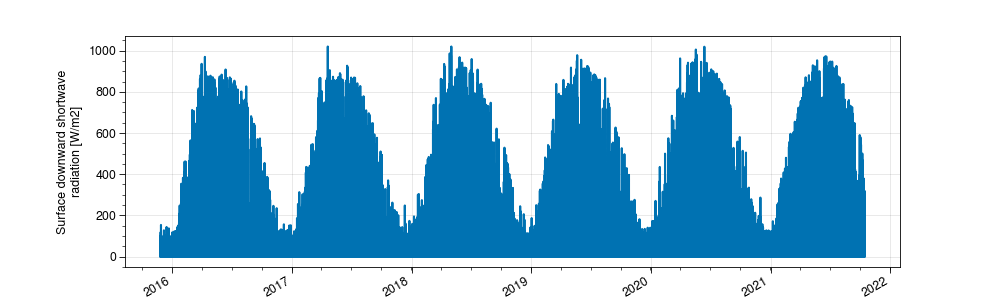

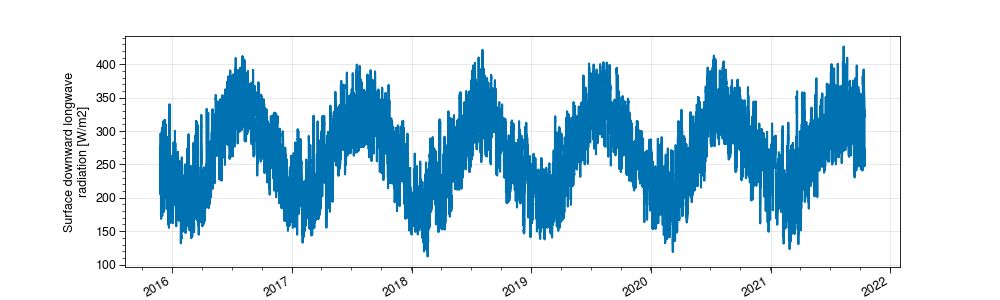

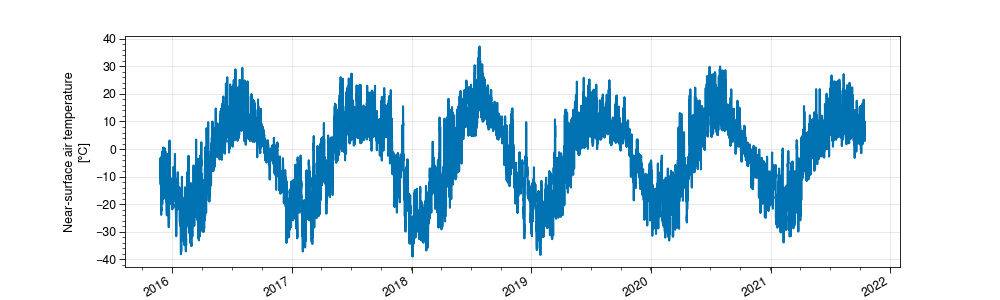

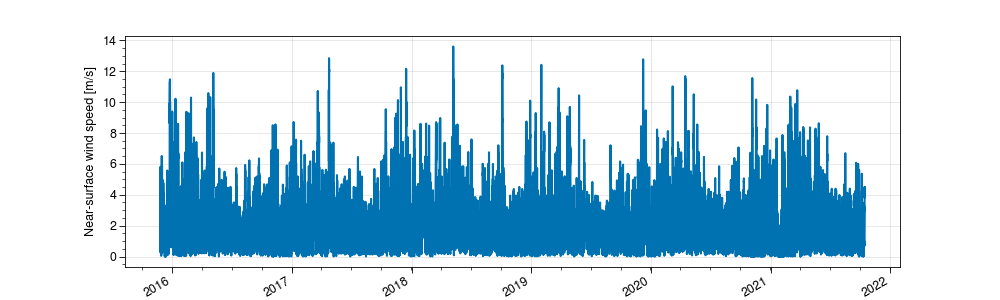

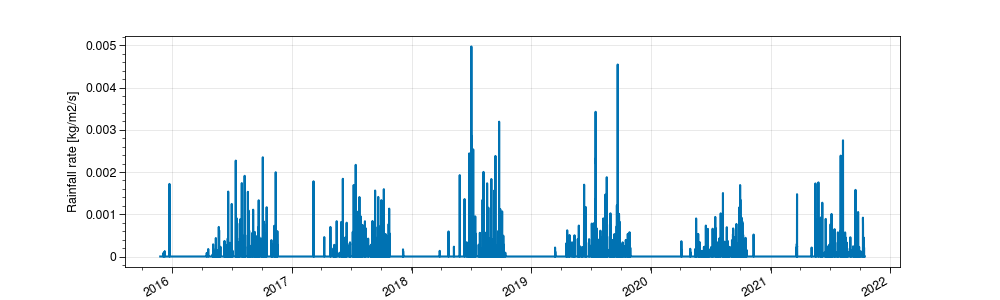

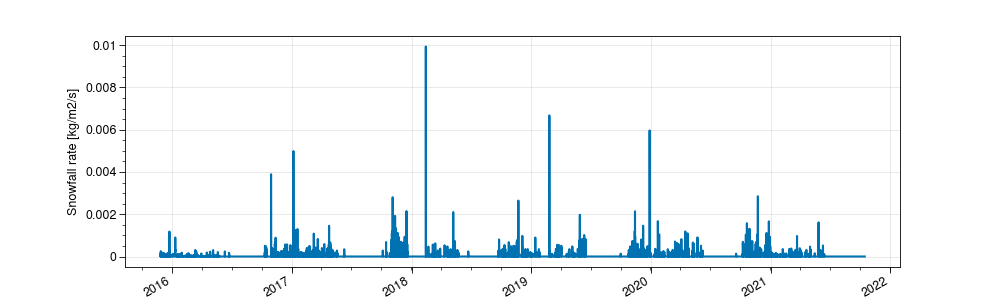

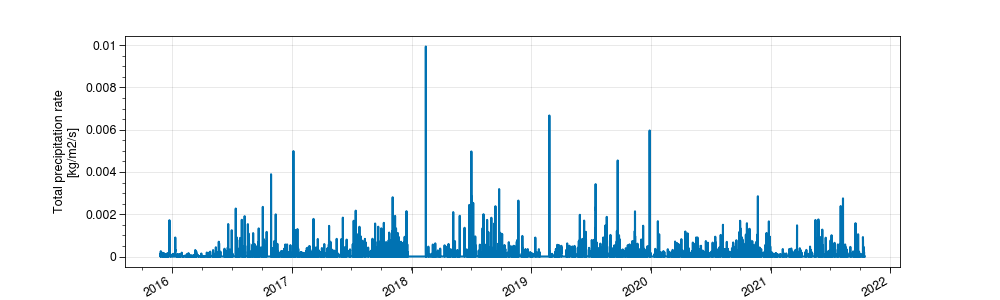

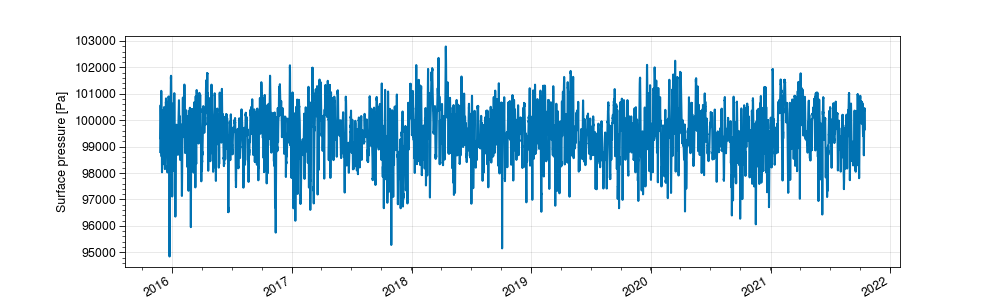

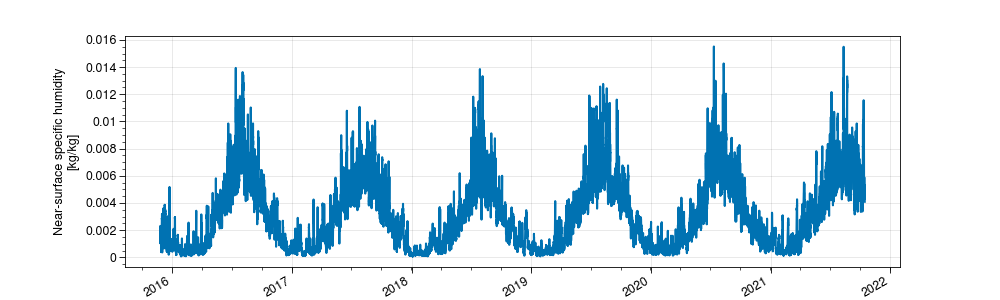

In [5]:
%matplotlib widget
for var in list(ds.keys()):
    ds[var].plot(figsize=(10,3))

In [6]:
ds.time.encoding

{'zlib': False,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets/met_insitu_umf_2015_2021.nc',
 'original_shape': (51596,),
 'dtype': dtype('int64'),
 'units': 'hours since 2015-11-26 04:00:00',
 'calendar': 'proleptic_gregorian'}

In [7]:
# Check if there are leap years
ds.sel(time='2016-02')

<xarray.Dataset>
Dimensions:    (time: 696)
Coordinates:
  * time       (time) datetime64[ns] 2016-02-01 ... 2016-02-29T23:00:00
Data variables:
    SWdown     (time) float64 ...
    LWdown     (time) float64 ...
    Tair       (time) float64 ...
    Wind       (time) float64 ...
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...

### Resample to 30 minute time step for CLASSIC
Otherwise CLASSIC interpolates the forcing by itself and makes some assumptions more adapted for 6h forcing files
(e.g., for the SWdown that will lose the peaks)

In [8]:
ds_30min = ds.resample(time='30min').interpolate()
ds_30min

<xarray.Dataset>
Dimensions:    (time: 103191)
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-14T23:00:00
Data variables:
    SWdown     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    LWdown     (time) float64 295.6 292.4 289.1 285.2 ... 272.6 267.4 262.2
    Tair       (time) float64 -6.742 -6.749 -6.757 -6.344 ... 4.286 4.0 3.714
    Wind       (time) float64 0.998 0.854 0.71 1.016 ... 4.289 4.404 4.448 4.492
    Rainf      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Snowf      (time) float64 0.0001024 8.331e-05 6.425e-05 ... 0.0 0.0 0.0
    TotPrecip  (time) float64 0.0001024 8.331e-05 6.425e-05 ... 0.0 0.0 0.0
    Psurf      (time) float64 9.88e+04 9.884e+04 ... 9.967e+04 9.965e+04
    Qair       (time) float64 0.001974 0.001979 0.001984 ... 0.004168 0.004091

### Extend beginning and the end of the forcing
Because CLASSIC only accept full years (will need to be removed for analyses)

In [9]:
time_ext = pd.date_range(
    pd.to_datetime(ds_30min.time.dt.year[0], format='%Y'), 
    str(ds_30min.time.dt.year[-1].values.item(0))+'-12-31 23:30:00',
    freq='30min'
)
time_ext

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 00:30:00',
               '2015-01-01 01:00:00', '2015-01-01 01:30:00',
               '2015-01-01 02:00:00', '2015-01-01 02:30:00',
               '2015-01-01 03:00:00', '2015-01-01 03:30:00',
               '2015-01-01 04:00:00', '2015-01-01 04:30:00',
               ...
               '2021-12-31 19:00:00', '2021-12-31 19:30:00',
               '2021-12-31 20:00:00', '2021-12-31 20:30:00',
               '2021-12-31 21:00:00', '2021-12-31 21:30:00',
               '2021-12-31 22:00:00', '2021-12-31 22:30:00',
               '2021-12-31 23:00:00', '2021-12-31 23:30:00'],
              dtype='datetime64[ns]', length=122736, freq='30T')

In [10]:
ds_30min_ext = ds_30min.reindex(time=time_ext)
ds_30min_ext

<xarray.Dataset>
Dimensions:    (time: 122736)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-12-31T23:30:00
Data variables:
    SWdown     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    LWdown     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Tair       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Wind       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Rainf      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Snowf      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    TotPrecip  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Psurf      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    Qair       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [11]:
# ds_30min    : XXXXXXXXXXXXXXXXXXXXXXXXXXXX........... i_start_next_year ....... i_end_next_year
# ds_30min_ext: 1rst jan .... i_before_start

i_before_start = ds_30min_ext.sel(time=slice(None,ds_30min.time[0])).time.size - 1 
i_start_next_year = ds_30min.sel(time=slice(None, year_start)).time.size
i_end_next_year = i_start_next_year + i_before_start

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_30min_ext['Wind'][:i_before_start].size,
    ds_30min['Wind'][i_start_next_year:i_end_next_year].size
)

for key in list(ds.keys()):
    ds_30min_ext[key][:i_before_start] = ds_30min[key][i_start_next_year:i_end_next_year].values

In [12]:
# ds_30min    : i_start_prev_year ....... i_end_prev_year.......XXXXXXXXXXXXXXXXXXXXXXXXXXXX
# ds_30min_ext: ............................................... i_after_end.......... 31 dec

i_after_end = ds_30min_ext.sel(time=slice(ds_30min.time[-1]+1, None)).time.size
i_end_prev_year = ds_30min.time.sel(time=slice(year_end, None)).time.size
i_start_prev_year = i_end_prev_year + i_after_end

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_30min_ext['Wind'][-i_after_end:].size,
    ds_30min['Wind'][-i_start_prev_year:-i_end_prev_year].size
)

for key in list(ds.keys()):
    ds_30min_ext[key][-i_after_end:] = ds_30min[key][-i_start_prev_year:-i_end_prev_year].values

Text(0.5, 0.98, 'Umiujaq FOREST, northeastern Canada')

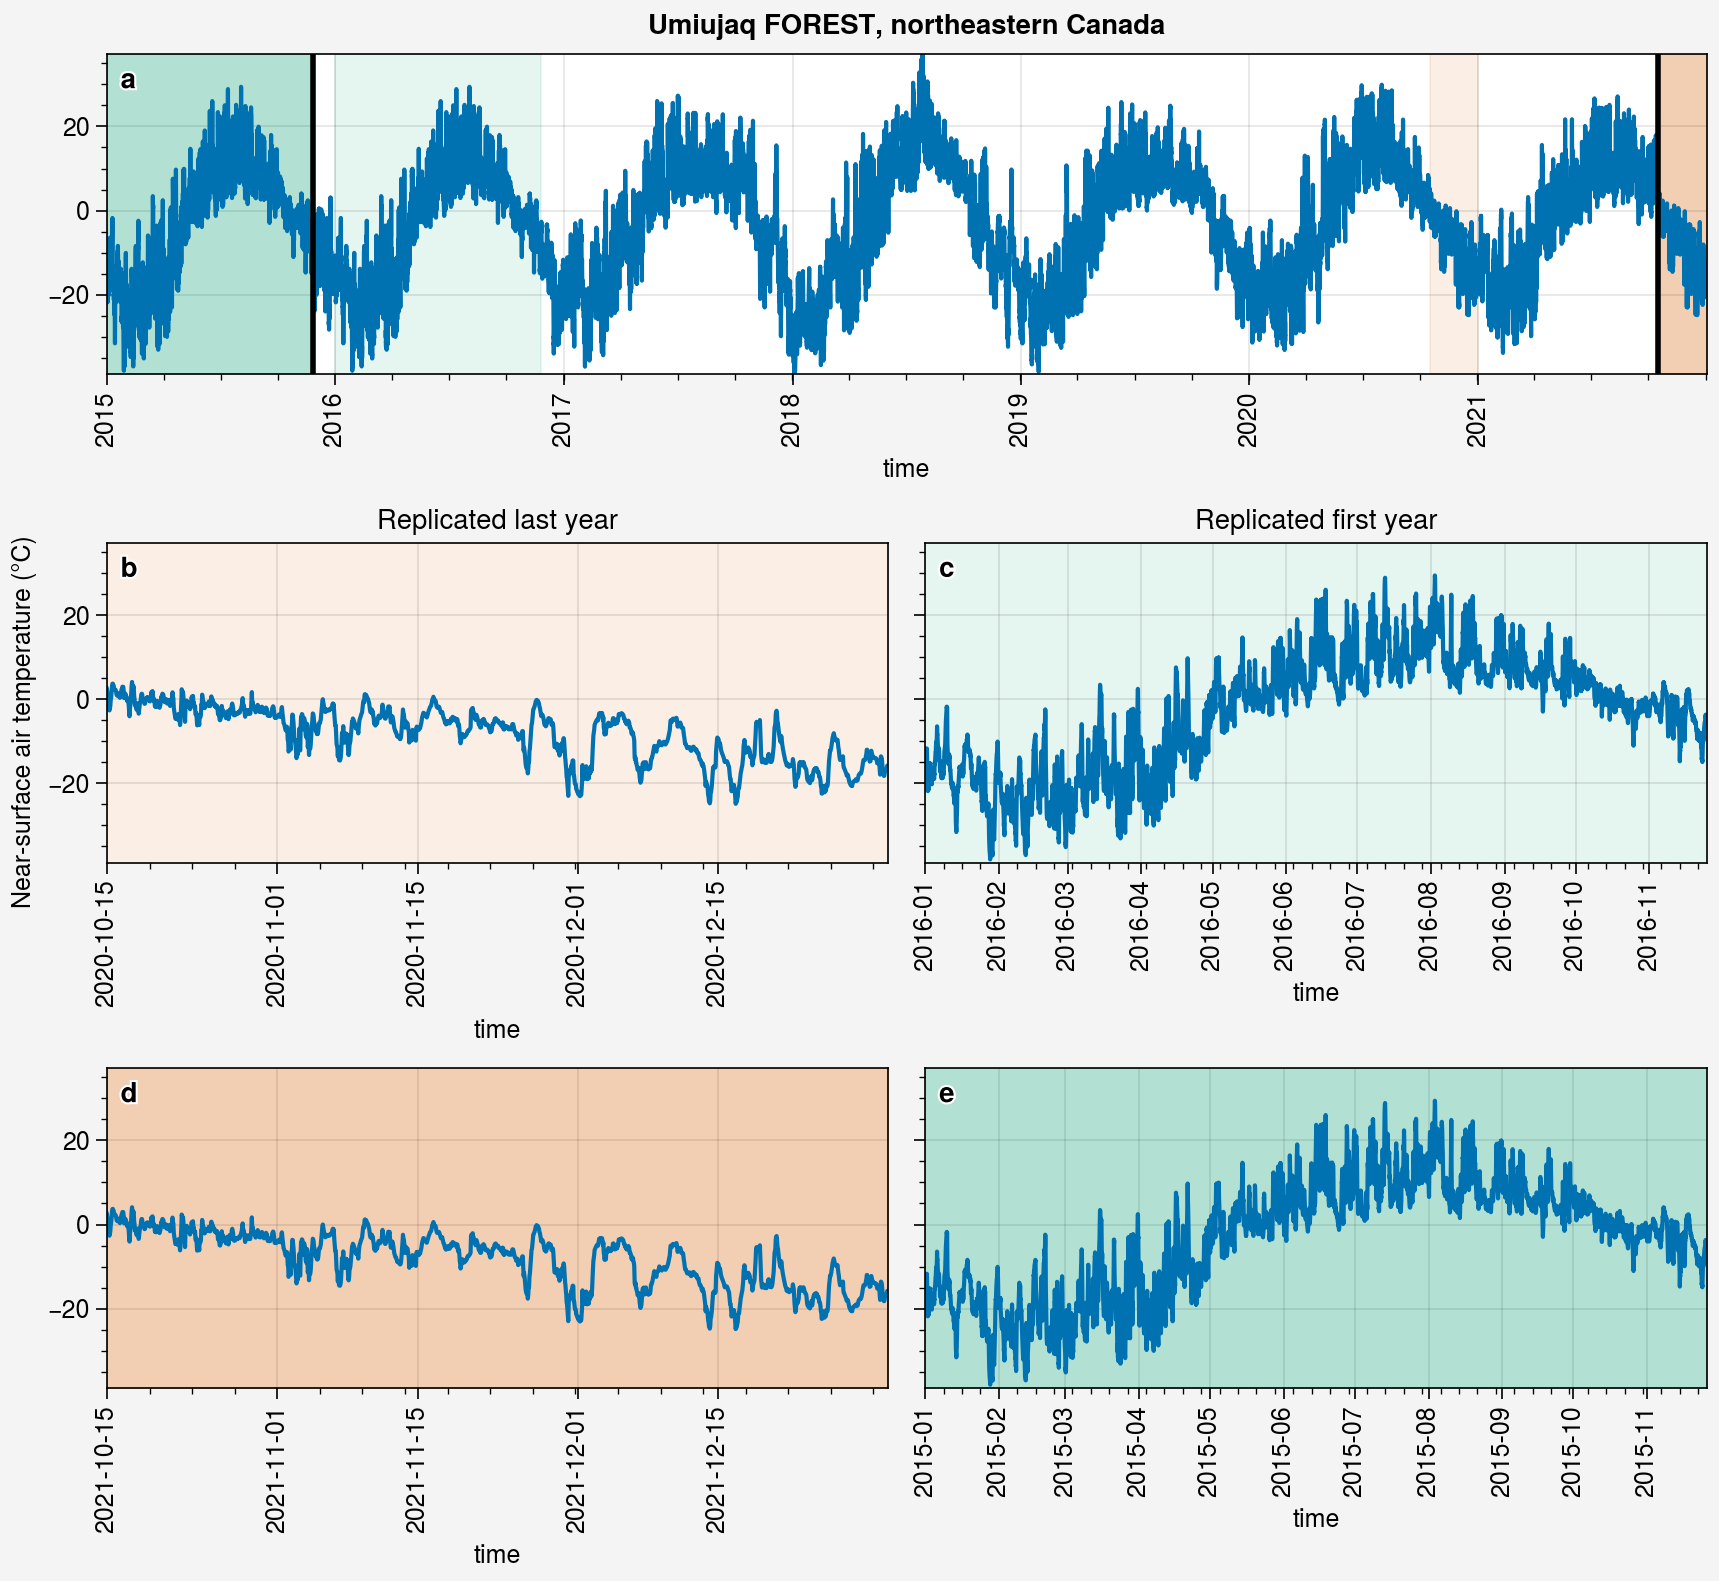

In [13]:
%matplotlib inline
fig, axs = pplt.subplots([[1, 1], [2, 3], [4, 5]], refaspect=5, refwidth=8, sharex=0)

key = 'Tair'

axs[0].plot(ds_30min_ext[key])

axs[0].fill_between(
    [ds_30min_ext[key][0].time.values, ds_30min_ext[key][i_before_start].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C2', alpha=0.3
)

axs[0].fill_between(
    [ds_30min[key][i_start_next_year].time.values, ds_30min[key][i_end_next_year].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C2', alpha=0.1
)

axs[0].fill_between(
    [ds_30min_ext[key][-i_after_end].time.values, ds_30min_ext[key][-1].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C1', alpha=0.3
)

axs[0].fill_between(
    [ds_30min[key][-i_start_prev_year].time.values, ds_30min[key][-i_end_prev_year].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C1', alpha=0.1
)

axs[0].axvline(ds_30min[key][0].time.values, lw=2, ls='-', color='k')
axs[0].axvline(ds_30min[key][-1].time.values, lw=2, ls='-', color='k')

axs[2].format(title='Replicated first year')
axs[4].plot(ds_30min_ext[key][:i_before_start])
axs[4].fill_between(
    [ds_30min_ext[key][0].time.values, ds_30min_ext[key][i_before_start].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C2', alpha=0.3
)
axs[2].plot(ds_30min[key][i_start_next_year:i_end_next_year])
axs[2].fill_between(
    [ds_30min[key][i_start_next_year].time.values, ds_30min[key][i_end_next_year].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C2', alpha=0.1
)

axs[1].format(title='Replicated last year')
axs[3].plot(ds_30min_ext[key][-i_after_end:])
axs[3].fill_between(
    [ds_30min_ext[key][-i_after_end].time.values, ds_30min_ext[key][-1].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C1', alpha=0.3
)
axs[1].plot(ds_30min[key][-i_start_prev_year:-i_end_prev_year])
axs[1].fill_between(
    [ds_30min[key][-i_start_prev_year].time.values, ds_30min[key][-i_end_prev_year].time.values], 
    ds_30min_ext[key].min(), ds_30min_ext[key].max(), color='C1', alpha=0.1
)

axs.format(abc=True, abcloc='ul')
fig.suptitle(site_longname)


### Convert time from relative to absolute
https://sourceforge.net/p/nco/discussion/9830/thread/175b4c98e1/?limit=25

The time format `day as %Y%m%d.%f` is <mark>**required** by CLASSIC</mark>

Note: you need CDO installed to run the next cell (`!` allow to run bash command in the notebook)

In [14]:
ds_30min_ext.to_netcdf(path_tmp+'/met_insitu_'+site+'_30min_ext_'+year_start+'_'+year_end+'.nc')

In [15]:
!cdo -a -f nc copy {path_tmp}/met_insitu_{site}_30min_ext_{year_start}_{year_end}.nc {path_tmp}/met_insitu_{site}_30min_ext_{year_start}_{year_end}_a.nc

cdo    copy:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    copy: Processed 1104624 values from 9 variables over 122736 timesteps [10.82s 456MB]


## Open the new file with absolute time

In [16]:
ds = xr.open_dataset(path_tmp+'/met_insitu_'+site+'_30min_ext_'+year_start+'_'+year_end+'_a.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 122736)
Coordinates:
  * time       (time) float64 2.015e+07 2.015e+07 ... 2.021e+07 2.021e+07
Data variables:
    SWdown     (time) float64 ...
    LWdown     (time) float64 ...
    Tair       (time) float64 ...
    Wind       (time) float64 ...
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Mar 05 16:58:13 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [17]:
ds.time

<xarray.DataArray 'time' (time: 122736)>
array([20150101.      , 20150101.020833, 20150101.041667, ..., 20211231.9375  ,
       20211231.958333, 20211231.979167])
Coordinates:
  * time     (time) float64 2.015e+07 2.015e+07 ... 2.021e+07 2.021e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

### Add the lat/lon dimensions of the site (<mark>required by CLASSIC</mark>)

Note: the values of the coordinates does not seem to matter for CLASSIC (the attributes neither)

In [18]:
ds = ds.assign_coords(lon=lon)
ds = ds.expand_dims('lon')
ds['lon'] = ds.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds = ds.assign_coords(lat=lat)
ds = ds.expand_dims('lat')
ds['lat'] = ds.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds = ds.transpose('time', 'lat', 'lon')

ds

<xarray.Dataset>
Dimensions:    (time: 122736, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 2.015e+07 2.015e+07 ... 2.021e+07 2.021e+07
  * lon        (lon) float64 -76.47
  * lat        (lat) float64 56.55
Data variables:
    SWdown     (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    LWdown     (time, lat, lon) float64 255.8 253.7 251.6 ... 229.3 230.1 230.4
    Tair       (time, lat, lon) float64 -13.03 -13.26 -13.49 ... -15.89 -16.31
    Wind       (time, lat, lon) float64 3.945 4.88 5.816 ... 2.123 2.765 2.697
    Rainf      (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf      (time, lat, lon) float64 3.789e-05 3.496e-05 ... 0.0 0.0
    TotPrecip  (time, lat, lon) float64 3.789e-05 3.496e-05 ... 0.0 0.0
    Psurf      (time, lat, lon) float64 9.79e+04 9.789e+04 ... 1.001e+05
    Qair       (time, lat, lon) float64 0.00105 0.001026 ... 0.0007761 0.0007438
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Mar 05 16:58:13 2024: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

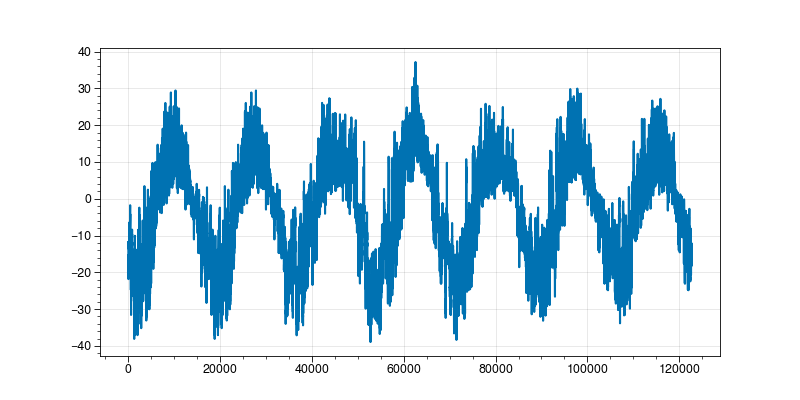

In [19]:
%matplotlib widget
plt.figure(figsize=(8,4))
plt.plot(ds.Tair.squeeze().values)

### Add Rainf and Snowf (<mark>required by CLASSIC</mark>)
Already done, just check

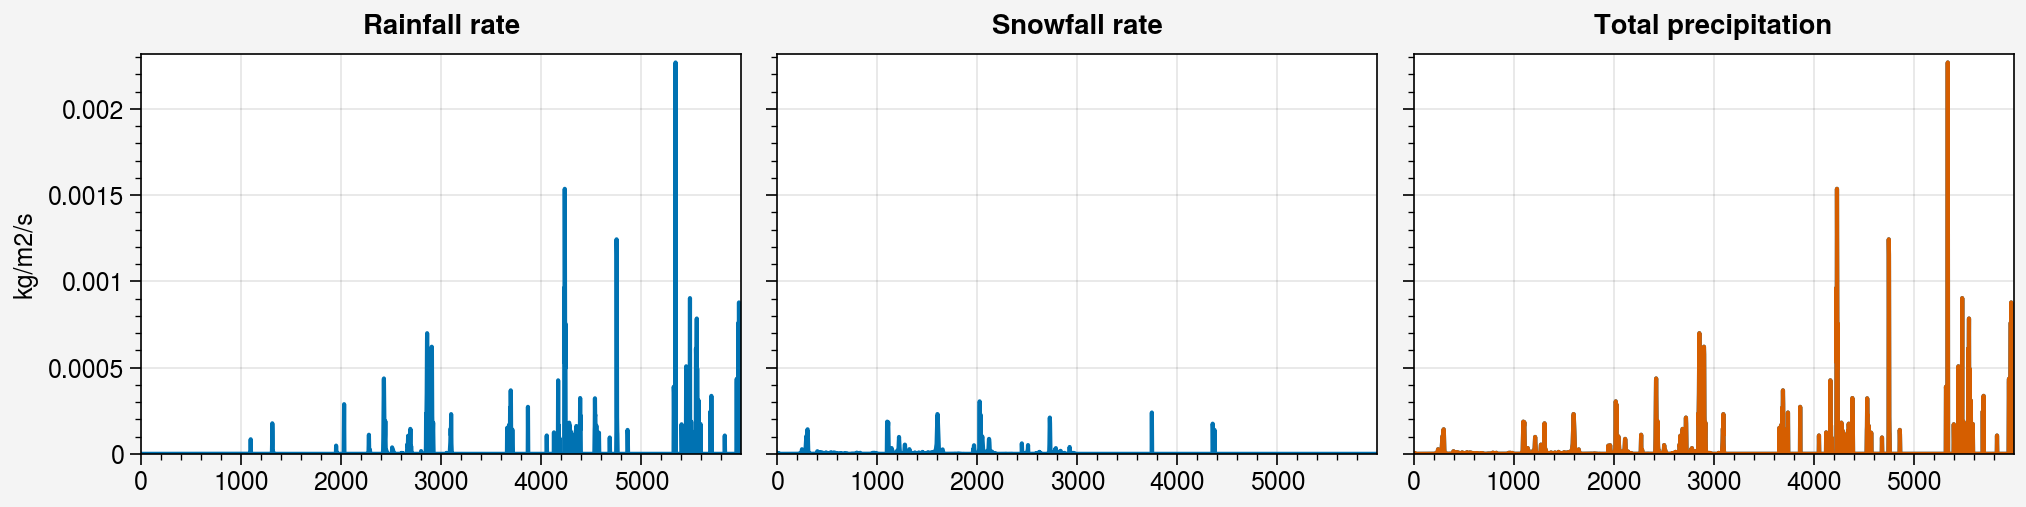

In [20]:
%matplotlib inline
fig, axs = pplt.subplots(ncols=3, nrows=1, refaspect=1.5, refwidth=3)

i_start = 2000*2
i_end = 5000*2

axs[0].plot(ds.Rainf.squeeze().values[i_start:i_end])
axs[1].plot(ds.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds.TotPrecip.squeeze().values[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds.Rainf.attrs['units'], 
        ylim=(0,max(ds.Rainf.squeeze().values[i_start:i_end] + ds.Snowf.squeeze().values[i_start:i_end]).item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds.Rainf.attrs['long_name'], ds.Snowf.attrs['long_name'], 'Total precipitation']
)


## Save forcing files

CLASSIC **requires** <mark>one file per forcing variable</mark>

Note: I save the files directly to CLASSIC folder and here to keep more flexibility in the future

In [21]:
for key in list(ds.keys()):
    ds[key].to_netcdf(path_out+'/met_insitu_'+site+'_30min_ext_'+year_start+'_'+year_end+'_'+key+'.nc')
    ds[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site+'_30min_ext_'+year_start+'_'+year_end+'_'+key+'.nc')

In [22]:
!ls {path_out}

met_insitu_umf_30min_ext_2015_2021_LWdown.nc
met_insitu_umf_30min_ext_2015_2021_Psurf.nc
met_insitu_umf_30min_ext_2015_2021_Qair.nc
met_insitu_umf_30min_ext_2015_2021_Rainf.nc
met_insitu_umf_30min_ext_2015_2021_Snowf.nc
met_insitu_umf_30min_ext_2015_2021_SWdown.nc
met_insitu_umf_30min_ext_2015_2021_Tair.nc
met_insitu_umf_30min_ext_2015_2021_TotPrecip.nc
met_insitu_umf_30min_ext_2015_2021_Wind.nc


In [23]:
!ls {path_out_CLASSIC}

met_insitu_umf_30min_ext_2015_2021_LWdown.nc
met_insitu_umf_30min_ext_2015_2021_Psurf.nc
met_insitu_umf_30min_ext_2015_2021_Qair.nc
met_insitu_umf_30min_ext_2015_2021_Rainf.nc
met_insitu_umf_30min_ext_2015_2021_Snowf.nc
met_insitu_umf_30min_ext_2015_2021_SWdown.nc
met_insitu_umf_30min_ext_2015_2021_Tair.nc
met_insitu_umf_30min_ext_2015_2021_TotPrecip.nc
met_insitu_umf_30min_ext_2015_2021_Wind.nc
